In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [5]:
# Parameter
xname = r"$M_{\nu}$"
xname_hat = r"$\hat{M}_\nu$"
xname_true = r"$M_{\nu, \mathrm{true}}$"
x_true = 0.06
x_lim = 0.06

# Data 
x_hat = np.array([6.182671e-02 , 5.221895e-02 , 5.418700e-02 , 5.600799e-02 , 7.835826e-02 , 6.746705e-02 , 6.094994e-02 , 5.807654e-02 , 5.806681e-02 , 4.690244e-02 , 8.023838e-02 , 6.006423e-02 , 6.138001e-02 , 4.659781e-02 , 6.648796e-02 , 5.444449e-02 , 7.654282e-02 , 5.978183e-02 , 6.017864e-02 , 6.131201e-02 , 6.095942e-02 , 7.734868e-02 , 6.037102e-02 , 6.535838e-02 , 7.018497e-02 , 4.273460e-02 , 5.327158e-02 , 5.291781e-02 , 7.320308e-02 , 5.883612e-02 , 4.165907e-02 , 8.190143e-02 , 4.692768e-02 , 5.870146e-02 , 5.808708e-02 , 5.143426e-02 , 6.079294e-02 , 4.630835e-02 , 6.346740e-02 , 6.223783e-02 , 4.375090e-02 , 7.320849e-02 , 6.134521e-02 , 6.762738e-02 , 6.847847e-02 , 5.856211e-02 , 6.156662e-02 , 4.104505e-02 , 4.505306e-02 , 7.236460e-02 , 4.033929e-02 , 5.802736e-02 , 7.583884e-02 , 5.574410e-02 , 5.411017e-02 , 5.483788e-02 , 4.882761e-02 , 5.937866e-02 , 6.312383e-02 , 4.308023e-02 , 5.123457e-02 , 7.034070e-02 , 5.868584e-02 , 5.095315e-02 , 7.146744e-02 , 5.290284e-02 , 5.950004e-02 , 6.371707e-02 , 4.838743e-02 , 6.203334e-02 , 7.450508e-02 , 6.547158e-02 , 6.658035e-02 , 5.579683e-02 , 5.586744e-02 , 6.511107e-02 , 6.461626e-02 , 5.078200e-02 , 4.177570e-02 , 6.679214e-02 , 6.681523e-02 , 6.433413e-02 , 7.995473e-02 , 5.711116e-02 , 4.866083e-02 , 6.352900e-02 , 4.429723e-02 , 6.540485e-02 , 6.064808e-02 , 4.982380e-02 , 5.442789e-02 , 6.765731e-02 , 7.849241e-02 , 5.920288e-02 , 4.972948e-02 , 7.166671e-02 , 6.661953e-02 , 6.471244e-02 , 7.387243e-02 , 7.631458e-02 , 6.387588e-02 , 5.248040e-02 , 7.229677e-02 , 6.603917e-02 , 4.461701e-02 , 6.335984e-02 , 6.167721e-02 , 6.512200e-02 , 9.491434e-02 , 5.771315e-02 , 5.440827e-02 , 6.732600e-02 , 5.016491e-02 , 5.643234e-02 , 4.569068e-02 , 5.817017e-02 , 4.142368e-02 , 6.236361e-02 , 6.797551e-02 , 6.086260e-02 , 5.327072e-02 , 7.320217e-02 , 7.300062e-02 , 7.566216e-02 , 5.238664e-02 , 5.838700e-02 , 6.074507e-02 , 5.626106e-02 , 5.516356e-02 , 5.707964e-02 , 5.770644e-02 , 5.443630e-02 , 7.008647e-02 , 6.340014e-02 , 6.287479e-02 , 6.173763e-02 , 5.768726e-02 , 5.896309e-02 , 6.778301e-02 , 6.660508e-02 , 6.319175e-02 , 6.542128e-02 , 5.819954e-02 , 5.894477e-02 , 4.484786e-02 , 6.276586e-02 , 4.138216e-02 , 5.361298e-02 , 5.013680e-02 , 5.940271e-02 , 6.638876e-02 , 7.771950e-02 , 5.866127e-02 , 5.055482e-02 , 7.011336e-02 , 5.811438e-02 , 5.118542e-02 , 5.359855e-02 , 4.936704e-02 , 6.878795e-02 , 7.104996e-02 , 5.842252e-02 , 5.901469e-02 , 4.946343e-02 , 6.046581e-02 , 7.075797e-02 , 6.905667e-02 , 6.360064e-02 , 6.696090e-02 , 6.600523e-02 , 6.744014e-02 , 5.498289e-02 , 4.487483e-02 , 4.342953e-02 , 4.556893e-02 , 5.568383e-02 , 3.186059e-02 , 3.971829e-02 , 5.436295e-02 , 6.740730e-02 , 6.358935e-02 , 5.300527e-02 , 5.070186e-02 , 4.562343e-02 , 5.432017e-02 , 5.116865e-02 , 6.752530e-02 , 6.042177e-02 , 5.053016e-02 , 5.884137e-02 , 5.948238e-02 , 4.276763e-02 , 4.265118e-02 , 4.816691e-02 , 6.746314e-02 , 4.732031e-02 , 5.192157e-02 , 5.931365e-02 , 5.250764e-02 , 5.135615e-02 , 5.370856e-02 , 7.275269e-02 , 2.720530e-02 , 5.907118e-02 , 6.395568e-02 , 6.606432e-02 , 7.111012e-02 , 4.673972e-02 , 6.021683e-02 , 6.328207e-02 , 5.846429e-02 , 5.964175e-02 , 6.359675e-02 , 6.264365e-02 , 5.649595e-02 , 5.041373e-02 , 6.923706e-02 , 6.277605e-02 , 6.041730e-02 , 7.130311e-02 , 6.120902e-02 , 6.488778e-02 , 5.808430e-02 , 5.302114e-02 , 5.645607e-02 , 7.931529e-02 , 6.458780e-02 , 6.135986e-02 , 5.191318e-02 , 6.658535e-02 , 6.905180e-02 , 4.751176e-02 , 6.343472e-02 , 4.911764e-02 , 6.275642e-02 , 6.818420e-02 , 6.975082e-02 , 4.843877e-02 , 4.337978e-02 , 5.658949e-02 , 7.685874e-02 , 4.363805e-02 , 7.018737e-02 , 5.794069e-02 , 5.091376e-02 , 4.389749e-02 , 6.457203e-02 , 6.129567e-02 , 7.551994e-02 , 5.481960e-02])
lnL_hat = -np.array([339.30, 302.79, 284.18, 348.50, 306.90, 298.17, 291.85, 303.38, 301.64, 333.85, 303.71, 331.27, 308.52, 335.19, 311.08, 327.31, 293.51, 282.84, 315.28, 300.49, 318.65, 300.94, 275.44, 324.28, 330.63, 338.57, 306.68, 300.84, 291.10, 301.94, 306.89, 305.27, 302.01, 281.87, 304.81, 300.52, 293.00, 285.19, 310.51, 317.55, 305.63, 321.65, 294.93, 300.12, 304.92, 307.16, 330.52, 310.82, 300.44, 309.28, 304.11, 331.71, 282.40, 284.74, 298.54, 304.54, 287.87, 298.13, 312.22, 314.11, 316.36, 307.38, 329.21, 302.27, 289.43, 309.55, 293.96, 287.83, 307.21, 286.71, 312.00, 295.85, 316.32, 312.88, 308.20, 315.20, 298.25, 289.95, 319.43, 270.63, 306.17, 269.22, 306.67, 293.92, 333.75, 323.32, 309.75, 282.74, 324.42, 299.54, 334.08, 321.39, 300.42, 295.49, 308.95, 297.98, 270.30, 300.45, 318.07, 293.55, 300.87, 296.61, 314.77, 317.48, 306.32, 298.82, 320.57, 337.12, 287.96, 292.40, 287.29, 294.82, 286.56, 307.07, 291.18, 296.24, 313.71, 309.12, 333.18, 290.87, 315.27, 275.31, 332.83, 298.22, 340.65, 298.55, 284.56, 300.06, 302.30, 329.93, 311.02, 294.43, 309.36, 262.82, 317.00, 296.96, 289.85, 286.40, 311.24, 309.52, 304.42, 296.49, 304.03, 282.42, 310.52, 285.83, 291.38, 300.76, 310.79, 356.00, 308.37, 304.54, 291.96, 260.43, 297.26, 301.17, 276.83, 297.30, 271.08, 304.28, 314.95, 308.41, 313.29, 344.62, 296.77, 283.92, 290.79, 310.70, 334.39, 276.43, 317.65, 312.99, 285.21, 272.24, 302.49, 321.13, 319.32, 320.53, 275.65, 329.59, 259.24, 305.76, 317.47, 299.91, 318.44, 290.69, 275.93, 300.78, 291.38, 332.64, 311.08, 324.49, 339.40, 297.35, 319.30, 323.89, 342.65, 298.42, 280.19, 280.04, 341.80, 291.68, 305.01, 327.02, 315.08, 314.35, 296.44, 343.71, 267.48, 302.39, 310.30, 298.30, 308.14, 308.97, 308.57, 344.89, 304.44, 308.63, 300.14, 305.62, 285.51, 279.79, 306.78, 322.18, 315.72, 280.45, 315.30, 313.96, 309.93, 320.22, 300.59, 317.48, 311.94, 291.73, 307.22, 293.29, 299.88, 321.65, 314.49, 311.42, 304.09, 296.04, 313.95, 292.15, 303.32, 298.04, 297.24, 315.69, 296.35, 321.44])
lnL_tru = -np.array([339.32, 303.05, 284.36, 348.57, 308.61, 298.42, 291.89, 303.42, 301.68, 334.67, 305.84, 331.29, 308.55, 335.95, 311.30, 327.54, 294.77, 282.85, 315.29, 300.50, 318.66, 302.42, 275.45, 324.47, 331.12, 340.12, 306.92, 301.12, 292.05, 301.96, 308.64, 307.71, 302.87, 281.90, 304.85, 300.85, 293.02, 286.08, 310.59, 317.58, 307.05, 322.50, 294.96, 300.39, 305.27, 307.18, 330.56, 312.68, 301.55, 309.94, 306.19, 331.74, 283.73, 284.86, 298.75, 304.70, 288.61, 298.14, 312.29, 315.58, 316.74, 307.93, 329.23, 302.69, 290.04, 309.83, 293.97, 287.91, 307.87, 286.73, 313.02, 296.01, 316.52, 312.97, 308.32, 315.32, 298.34, 290.48, 321.09, 270.81, 306.46, 269.29, 308.72, 293.96, 334.46, 323.37, 311.02, 282.92, 324.43, 300.16, 334.24, 321.71, 302.22, 295.50, 309.44, 298.59, 270.52, 300.58, 319.04, 295.03, 300.94, 296.94, 315.52, 317.71, 307.53, 298.91, 320.61, 337.27, 294.13, 292.42, 287.47, 295.11, 287.00, 307.15, 292.27, 296.27, 315.55, 309.17, 333.47, 290.89, 315.55, 276.04, 333.69, 299.51, 340.92, 298.59, 284.57, 300.13, 302.44, 329.98, 311.05, 294.63, 309.93, 262.87, 317.06, 296.98, 289.88, 286.43, 311.60, 309.75, 304.49, 296.62, 304.05, 282.43, 311.64, 285.89, 293.14, 301.01, 311.27, 356.00, 308.58, 305.94, 292.00, 260.87, 297.85, 301.21, 277.21, 297.51, 271.67, 304.68, 315.61, 308.42, 313.31, 345.24, 296.77, 284.51, 291.19, 310.78, 334.64, 276.63, 317.86, 313.13, 286.30, 273.55, 303.55, 321.26, 323.18, 322.64, 275.89, 329.85, 259.33, 306.00, 317.91, 300.92, 318.63, 291.06, 276.17, 300.79, 291.89, 332.65, 311.09, 325.98, 340.92, 298.06, 319.59, 324.76, 342.97, 298.44, 280.42, 280.38, 341.99, 292.59, 310.48, 327.03, 315.18, 314.58, 297.10, 344.65, 267.49, 302.45, 310.32, 298.31, 308.22, 309.04, 308.65, 345.37, 304.83, 308.66, 300.15, 306.23, 285.52, 279.90, 306.83, 322.41, 315.79, 282.22, 315.39, 313.98, 310.29, 320.46, 301.02, 318.23, 312.00, 292.35, 307.27, 293.64, 300.30, 322.41, 315.93, 311.46, 305.62, 297.46, 314.47, 292.18, 303.74, 299.34, 297.34, 315.72, 297.51, 321.59])

# Asimov data set
xs_asimov   =   np.array([0.030, 0.035, 0.040, 0.045, 0.050, 0.055, 0.060, 0.065, 0.070, 0.075, 0.080, 0.085, 0.090])
chi2_asimov = 2*np.array([ 4.47,  3.11,  2.00,  1.13,  0.50,  0.13,  0.00,  0.12,  0.50,  1.12,  1.99,  3.11,  4.46])

# Compute likelihood ratio
LR = -2*(lnL_tru - lnL_hat)
print("max LR: ", np.max(LR))

max LR:  12.340000000000032


In [6]:
# histogram settings
bin_width = 0.5
bin_max = 12
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max, bin_width/10.)
N_LR = len(LR)
nbins = len(bins)
norm = bin_width*N_LR

# x settings
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

In [7]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [8]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

MLE:  0.06001550169113867
1 sigma:  0.010037977513543093


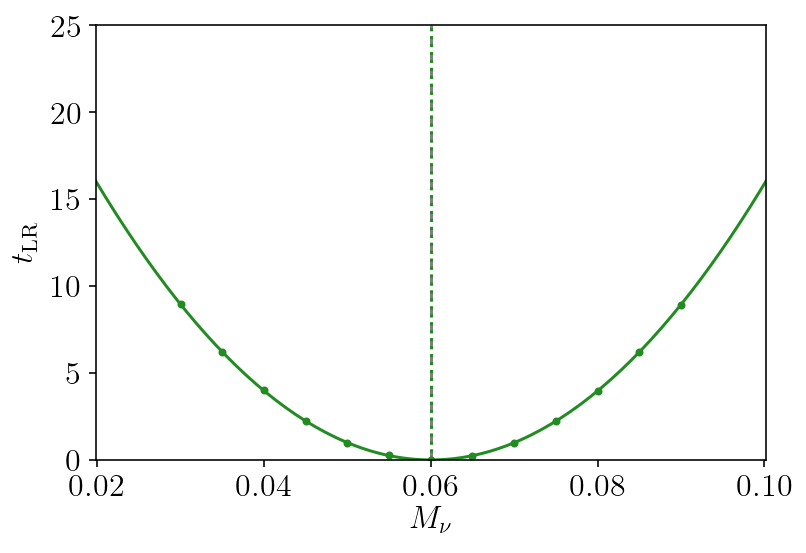

In [9]:
#### Compute Asimov error

#Fit parabola
[a,b,c], pcov = curve_fit(parab, xs_asimov, chi2_asimov, p0=[0.72, 1185714, 0.67], maxfev=30000)
fit_x = x_bins_fine
fit_y = b * (fit_x-c)**2.
parabola_min = a

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("MLE: ", c)
zeros = fsolve(parabola, x0=[0.0,5.])
sigma = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma)
sigma_asimov = sigma

# Set x_lim
x_lim = 4*sigma_asimov

# Plot
plt.plot(xs_asimov, chi2_asimov, marker=".", ls="", color="forestgreen")
plt.plot(fit_x, fit_y, color='forestgreen', ls='-')
plt.vlines(x_true, 0, 25, color="grey", ls="--")
plt.vlines(c, 0, 25, color="forestgreen", ls=":")
plt.hlines(1, 0.65, 0.70, color="forestgreen", ls=":")
plt.ylabel(r"$t_\mathrm{LR}$")
plt.xlabel(xname)
plt.ylim([0,25])
plt.xlim([x_true-x_lim, x_true+x_lim])

plt.show()

In [10]:
# Adapt h bin settings
x_lim = 4*sigma_asimov
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

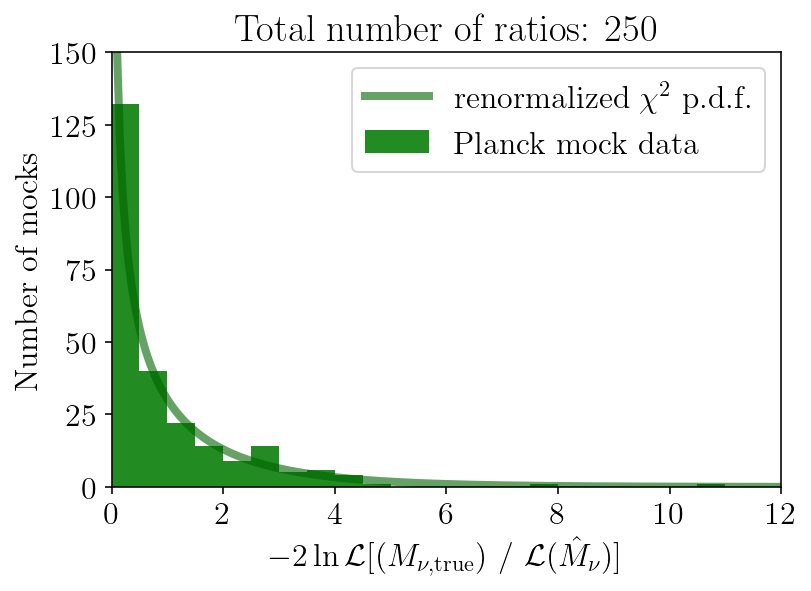

In [11]:
# Plot LR histogram
plt.hist(LR, bins=bins, color="forestgreen", label="Planck mock data")
plt.plot(bins_fine, norm*chi2.pdf(bins_fine, df=1), color="darkgreen", lw=4, alpha=0.6, label=r'renormalized $\chi^2$ p.d.f.')
plt.xlim([0,bin_max])
plt.ylim([0,150])
plt.xlabel(r"$-2\ln\mathcal{L}$[("+xname_true+r") / {$\mathcal{L}$("+xname_hat+r")]")
plt.ylabel("Number of mocks")
plt.title("Total number of ratios: "+str(N_LR))
plt.legend()
plt.show()

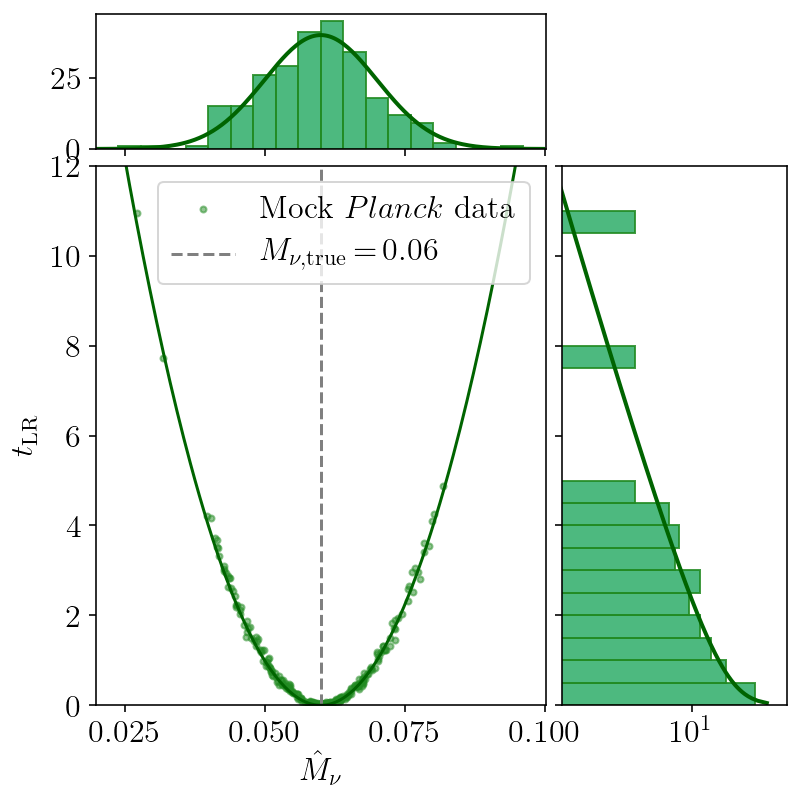

In [12]:
#### LR triangle plot
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(x_hat, LR, color="forestgreen", alpha=0.5, edgecolor='forestgreen', marker=".", label=r"Mock ${Planck}$ data")
ax.plot(x_bins_fine, (x_bins_fine-x_true)**2/sigma_asimov**2, color='darkgreen', ls='-')
ax.vlines(x_true, 0, bin_max, ls="--", color="grey", label=xname_true+r"$\, =\, $"+str(x_true))
ax.set_xlim([x_true-x_lim, x_true+x_lim])
ax.set_ylim([0,bin_max])
ax.set_xlabel(xname_hat)
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend()

# Hist x 
ax_histx.hist(x_hat, bins=x_bins, color="turquoise", alpha=0.7, edgecolor='forestgreen')
ax_histx.hist(x_hat, bins=x_bins, color="forestgreen", alpha=0.5, edgecolor='forestgreen')
ax_histx.plot(x_bins_fine, norm_x*Gauss.pdf(x_bins_fine, loc=x_true, scale=sigma_asimov), color='darkgreen', lw=2)

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color="turquoise", alpha=0.7, edgecolor='forestgreen')
ax_histy.hist(LR, bins=bins, orientation='horizontal', color="forestgreen", alpha=0.5, edgecolor='forestgreen')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='darkgreen', lw=2)
ax_histy.set_xlim([5e-2,5e2])
ax_histy.set_xscale("log")

plt.savefig("LR_hist_fixed_NP_Mnu.pdf", format="PDF", bbox_inches='tight')
plt.show()

In [13]:
# Find \Delta\chi^2 for which 68.27% of mocks are below
LR_cutoff = 0.98
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

68.0 % of mocks below:  0.98


In [14]:
# Compare sigma_asimov and sigma_mocks:
print("sigma_asimov: ", sigma_asimov)
print("sigma_mocks: ", np.std(x_hat))

sigma_asimov:  0.010037977513543093
sigma_mocks:  0.009861539324119846
